# Current Market Data

In [1]:
import requests

# --------- CONFIG ---------
API_KEY = '82cVbf8l0u54701P'              # Replace with your API key
BASE_URL = 'https://demo-api-capital.backend-capital.com'
LOGIN_URL = f'{BASE_URL}/api/v1/session'
EMAIL = 'raaifmookanay@gmail.com'            
PASSWORD = 'Liwa@2014'    
SEARCH_TERM = 'Apple'
# --------------------------

# Step 1: Authenticate
def authenticate():
    headers = {'X-CAP-API-KEY': API_KEY}
    payload = {'identifier': EMAIL, 'password': PASSWORD}
    res = requests.post(LOGIN_URL, json=payload, headers=headers)
    if res.status_code != 200:
        raise Exception("Authentication failed:", res.json())
    cst = res.headers['CST']
    xst = res.headers['X-SECURITY-TOKEN']
    print("Authenticated successfully.")
    return cst, xst

# Step 2: Search for Apple and get EPIC
def get_apple_epic(cst, xst):
    headers = {
        'CST': cst,
        'X-SECURITY-TOKEN': xst,
        'X-CAP-API-KEY': API_KEY
    }
    params = {'search': SEARCH_TERM}
    res = requests.get(f"{BASE_URL}/api/v1/markets", headers=headers, params=params)
    markets = res.json().get('markets', [])
    for m in markets:
        if 'Apple' in m['instrumentName']:
            print(f"found: {m['instrumentName']} | EPIC: {m['epic']}")
            return m['epic']
    raise Exception("Apple stock not found.")

# Step 3: Get Market Snapshot
def get_market_data(epic, cst, xst):
    headers = {
        'CST': cst,
        'X-SECURITY-TOKEN': xst,
        'X-CAP-API-KEY': API_KEY
    }
    res = requests.get(f"{BASE_URL}/api/v1/markets/{epic}", headers=headers)
    if res.status_code != 200:
        print("Failed to fetch market data:", res.json())
        return
    market_data = res.json()['snapshot']
    print(f"\n Apple Market Data:\n"
          f"  Bid: {market_data['bid']}\n"
          f"  Ask: {market_data['offer']}\n"
          f"  High: {market_data['high']}\n"
          f"  Low: {market_data['low']}\n"
          f"  Change: {market_data['percentageChange']}%\n"
          f"  Update Time: {market_data['updateTime']}")
    

# ---------- RUN ----------
if __name__ == "__main__":
    cst, xst = authenticate()
    epic = get_apple_epic(cst, xst)
    get_market_data(epic, cst, xst)


Authenticated successfully.
found: Apple Inc (Extended Hours) | EPIC: AAPL

 Apple Market Data:
  Bid: 210.21
  Ask: 210.42
  High: 213.04
  Low: 209.75
  Change: -0.73%
  Update Time: 2025-07-03T14:15:44.078


# Historical data

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil import parser 
import pandas as pd

def get_price_history(epic, cst, xst, resolution="DAY", from_date= None, to_date= None, max_points=1000):
    headers = {
        'CST': cst,
        'X-SECURITY-TOKEN': xst,
        'X-CAP-API-KEY': API_KEY
    }

    params = {
        'resolution': resolution,
        'max': max_points
    }

    if from_date and to_date:
        params['from'] = from_date
        params['to'] = to_date

    url = f"{BASE_URL}/api/v1/prices/{epic}"
    response = requests.get(url, headers=headers, params=params)
    #print("🔎 Raw response:", response.status_code, response.text)

    if response.status_code != 200:
        print("❌ Error getting historical data:", response.json())
        return

    prices = response.json().get("prices", [])
    print(f"✅ Retrieved {len(prices)} candles")

    # Prepare list of dicts for DataFrame
    data = []
    for p in prices:
        data.append({
            "Time": parser.isoparse(p['snapshotTime']),
            "Open": p['openPrice']['bid'],
            "High": p['highPrice']['bid'],
            "Low": p['lowPrice']['bid'],
            "Close_Bid": p['closePrice']['bid'],
            "Close_Ask": p['closePrice']['ask'],
            "Volume": p.get('volume', None)
        })

    df = pd.DataFrame(data)
    return df

# Pairs Trading (ARKK & PYPL)

## ARKK Data

In [3]:
arkk1 = get_price_history(
    epic= "ARKK",
    cst=cst,
    xst=xst,
    resolution="DAY",
    from_date="2021-01-01T00:00:00",
    to_date="2023-01-01T00:00:00"
)

✅ Retrieved 502 candles


In [4]:
arkk1

,Time,Open,High,Low,Close_Bid,Close_Ask,Volume
0,2021-01-04 04:00:00,125.72,126.76,122.05,124.30,125.13,None
1,2021-01-05 04:00:00,123.92,127.43,123.91,127.37,128.21,None
2,2021-01-06 04:00:00,126.26,130.71,125.45,127.71,128.65,None
3,2021-01-07 04:00:00,130.69,138.18,130.69,137.87,138.83,None
4,2021-01-08 04:00:00,141.55,145.17,138.86,142.03,143.03,None
...,...,...,...,...,...,...,...
497,2022-12-23 04:00:00,31.30,31.53,30.57,30.76,31.11,None
498,2022-12-27 04:00:00,30.39,30.44,29.54,29.66,29.90,None
499,2022-12-28 04:00:00,29.56,30.15,29.32,29.53,30.12,None
500,2022-12-29 04:00:00,30.11,31.27,29.84,30.94,31.31,None


In [5]:
arkk2 = get_price_history(
    epic= "ARKK",
    cst=cst,
    xst=xst,
    resolution="DAY",
    from_date="2023-01-01T00:00:00",
    to_date="2025-07-01T00:00:00"
)

✅ Retrieved 625 candles


In [6]:
arkk2

,Time,Open,High,Low,Close_Bid,Close_Ask,Volume
0,2023-01-03 04:00:00,31.74,32.01,29.91,30.31,30.65,None
1,2023-01-04 04:00:00,30.85,31.81,30.46,31.61,31.98,None
2,2023-01-05 04:00:00,31.22,31.30,30.43,30.85,31.19,None
3,2023-01-06 04:00:00,30.93,31.55,29.94,30.87,31.50,None
4,2023-01-09 04:00:00,32.34,33.32,31.90,32.49,33.35,None
...,...,...,...,...,...,...,...
620,2025-06-25 04:00:00,70.76,71.22,68.59,68.59,69.76,None
621,2025-06-26 04:00:00,69.77,71.12,69.55,69.87,72.05,None
622,2025-06-27 04:00:00,71.04,71.10,68.86,69.50,69.90,None
623,2025-06-30 04:00:00,70.15,70.89,69.95,69.95,72.05,None


In [7]:
arkk = pd.concat([arkk1, arkk2], ignore_index = True)

In [8]:
arkk

,Time,Open,High,Low,Close_Bid,Close_Ask,Volume
0,2021-01-04 04:00:00,125.72,126.76,122.05,124.30,125.13,None
1,2021-01-05 04:00:00,123.92,127.43,123.91,127.37,128.21,None
2,2021-01-06 04:00:00,126.26,130.71,125.45,127.71,128.65,None
3,2021-01-07 04:00:00,130.69,138.18,130.69,137.87,138.83,None
4,2021-01-08 04:00:00,141.55,145.17,138.86,142.03,143.03,None
...,...,...,...,...,...,...,...
1122,2025-06-25 04:00:00,70.76,71.22,68.59,68.59,69.76,None
1123,2025-06-26 04:00:00,69.77,71.12,69.55,69.87,72.05,None
1124,2025-06-27 04:00:00,71.04,71.10,68.86,69.50,69.90,None
1125,2025-06-30 04:00:00,70.15,70.89,69.95,69.95,72.05,None


## PYPL Data

In [9]:
pypl1 = get_price_history(
    epic= "PYPL",
    cst=cst,
    xst=xst,
    resolution="DAY",
    from_date="2021-01-01T00:00:00",
    to_date="2023-01-01T00:00:00"
)

✅ Retrieved 507 candles


In [10]:
pypl2 = get_price_history(
    epic= "PYPL",
    cst=cst,
    xst=xst,
    resolution="DAY",
    from_date="2023-01-01T00:00:00",
    to_date="2025-07-01T00:00:00"
)

✅ Retrieved 629 candles


In [11]:
pypl = pd.concat([pypl1, pypl2],ignore_index = True)

In [12]:
pypl

,Time,Open,High,Low,Close_Bid,Close_Ask,Volume
0,2021-01-01 04:00:00,233.99,234.00,233.79,233.79,234.41,None
1,2021-01-04 04:00:00,237.79,237.79,227.32,230.84,231.96,None
2,2021-01-05 04:00:00,230.84,235.54,228.12,235.29,236.11,None
3,2021-01-06 04:00:00,235.31,235.79,225.40,227.35,228.14,None
4,2021-01-07 04:00:00,227.55,235.38,226.70,234.43,235.41,None
...,...,...,...,...,...,...,...
1131,2025-06-25 04:00:00,73.31,74.15,72.36,73.01,73.22,None
1132,2025-06-26 04:00:00,72.99,73.82,71.56,72.77,73.30,None
1133,2025-06-27 04:00:00,73.23,73.69,72.80,73.45,73.66,None
1134,2025-06-30 04:00:00,73.83,74.49,73.59,74.18,74.36,None


## Left Join ARKK & PYPL

In [13]:
pairs = pd.merge(arkk, pypl, on = "Time", how = "inner")

In [14]:
pairs

,Time,Open_x,High_x,Low_x,Close_Bid_x,Close_Ask_x,Volume_x,Open_y,High_y,Low_y,Close_Bid_y,Close_Ask_y,Volume_y
0,2021-01-04 04:00:00,125.72,126.76,122.05,124.30,125.13,None,237.79,237.79,227.32,230.84,231.96,None
1,2021-01-05 04:00:00,123.92,127.43,123.91,127.37,128.21,None,230.84,235.54,228.12,235.29,236.11,None
2,2021-01-06 04:00:00,126.26,130.71,125.45,127.71,128.65,None,235.31,235.79,225.40,227.35,228.14,None
3,2021-01-07 04:00:00,130.69,138.18,130.69,137.87,138.83,None,227.55,235.38,226.70,234.43,235.41,None
4,2021-01-08 04:00:00,141.55,145.17,138.86,142.03,143.03,None,234.46,242.68,234.46,242.68,243.22,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2025-06-25 04:00:00,70.76,71.22,68.59,68.59,69.76,None,73.31,74.15,72.36,73.01,73.22,None
1123,2025-06-26 04:00:00,69.77,71.12,69.55,69.87,72.05,None,72.99,73.82,71.56,72.77,73.30,None
1124,2025-06-27 04:00:00,71.04,71.10,68.86,69.50,69.90,None,73.23,73.69,72.80,73.45,73.66,None
1125,2025-06-30 04:00:00,70.15,70.89,69.95,69.95,72.05,None,73.83,74.49,73.59,74.18,74.36,None


## Calculating Bid Mid-price

In [15]:
pairs["Mid_price_bid_x"] = (pairs["Open_x"] + pairs["Close_Bid_x"])/2
pairs["Mid_price_bid_y"] = (pairs["Open_y"] + pairs["Close_Bid_y"])/2

## Calculating Ask Mid-price

In [16]:
pairs["Mid_price_ask_x"] = (pairs["Open_x"] + pairs["Close_Ask_x"])/2
pairs["Mid_price_ask_y"] = (pairs["Open_y"] + pairs["Close_Ask_y"])/2

## Pearson Correlation 

In [17]:
pairs["Close_Bid_x"].corr(pairs["Close_Bid_y"])

0.9570888646836138

In [18]:
pairs["Close_Ask_x"].corr(pairs["Close_Ask_y"])

0.9568156548036981

In [19]:
pairs["Open_x"].corr(pairs["Open_y"])

0.9563082242051332

In [20]:
pairs["Mid_price_bid_x"].corr(pairs["Mid_price_bid_y"])

0.9569730562289718

In [21]:
pairs["Mid_price_ask_x"].corr(pairs["Mid_price_ask_y"])

0.9568345522505984

## Engle_Granger Test (Cointegration test)

In [22]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

In [23]:
score, pvalue, _ = coint(pairs["Close_Bid_x"],pairs["Close_Bid_y"])

In [24]:
pvalue

0.022907709657666715

## Calculating the Return

In [25]:
pairs_close = pairs[["Time","Close_Bid_x","Close_Bid_y","Close_Ask_x","Close_Ask_y"]].copy()
pairs_close["close_mid_x"] = (pairs_close["Close_Bid_x"]/2 + pairs_close["Close_Ask_x"]/2).copy()
pairs_close["close_mid_y"] = (pairs_close["Close_Bid_y"]/2 + pairs_close["Close_Ask_y"]/2).copy()

In [28]:
pairs_close["r_close_bid_x"] = pairs_close["Close_Bid_x"].pct_change().copy()
pairs_close["r_close_bid_y"] = pairs_close["Close_Bid_y"].pct_change().copy()
pairs_close["r_close_ask_x"] = pairs_close["Close_Ask_x"].pct_change().copy()
pairs_close["r_close_ask_y"] = pairs_close["Close_Ask_y"].pct_change().copy()
pairs_close["r_close_mid_x"] = pairs_close["close_mid_x"].pct_change().copy()
pairs_close["r_close_mid_y"] = pairs_close["close_mid_y"].pct_change().copy()
pairs_close = pairs_close.dropna().copy()

<Axes: >

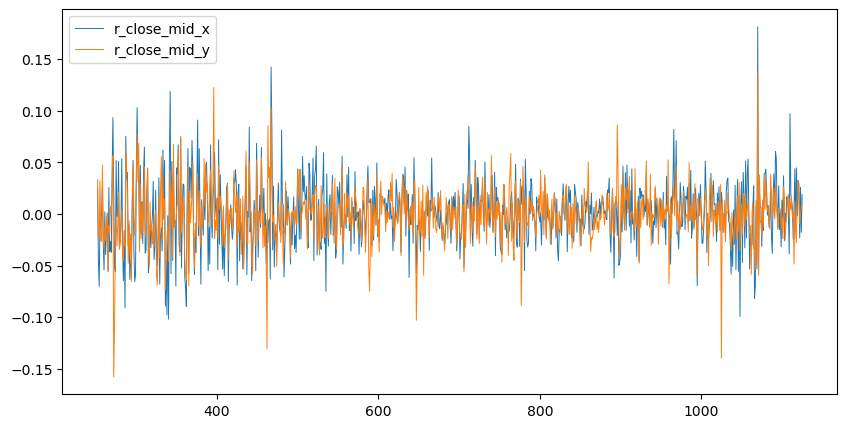

In [30]:
import matplotlib.pyplot as plt 

pairs_close_3y6m = pairs_close[(pairs_close["Time"] > "2022-01-01") & (pairs_close["Time"] < "2025-07-01")]
pairs_close_3y6m[["r_close_mid_x","r_close_mid_y"]].plot(figsize = (10,5), linewidth = 0.7)

In [31]:
pairs_close_3y6m["r_close_mid_x"].mean()
pairs_close_3y6m["r_close_mid_y"].mean()

-0.0007009337319598961

Furthermore, the mean of the two different equity AARK and PYPL are both close to zero and over a 3Y 6M period the returns seems to be stationary this seems promising for implementing the pairs trading strategy. 

## Checking Stationarity 

In [32]:
from statsmodels.tsa.stattools import adfuller

series1 = pairs_close_3y6m["r_close_mid_x"]
series2 = pairs_close_3y6m["r_close_mid_y"]

# Run ADF test for series 1
adf_result1 = adfuller(series1)
print("p-value",adf_result1[1])

# Run ADF test for series 2
adf_result2 = adfuller(series2)
print("p-value",adf_result2[1])

p-value 2.2371149848384097e-10
p-value 0.0


For both AARK and PYPL returns we reject the null hypothesis at 1% significance level that the returns are not stationary i.e. at 1% significance we can say that the returns are stationary. 

## Calculating Spread

In [33]:
# Spread = return_aark - return_pypl
pairs_close["spread_close_mid"] = pairs_close["r_close_mid_x"].copy() - pairs_close["r_close_mid_y"].copy()

<Axes: >

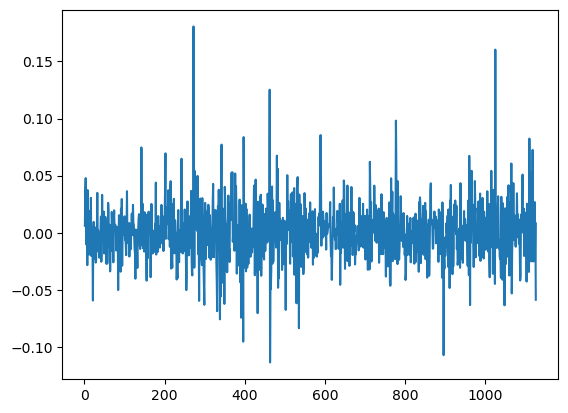

In [35]:
import matplotlib.pyplot as plt 
pairs_close["spread_close_mid"].plot()

## Estimating the Cointegration Relationship 